In [1]:
# checking the nr of SNPs

import numpy as np
import pandas as pd

chrom1_all = pd.read_csv("1permutationready.tsv", sep="\t")


In [2]:
chrom1_all['location'] = chrom1_all['location'].astype(float)

In [3]:
# Check for duplicate locations

location = chrom1_all["location"]

chrom1_all[location.isin(location[location.duplicated()])].sort_values("location")

,location,significant,3_prime_UTR_variant,5_prime_UTR_variant,NMD_transcript_variant,coding_sequence_variant,downstream_gene_variant,incomplete_terminal_codon_variant,intergenic_variant,intron_variant,...,non_coding_transcript_variant,splice_acceptor_variant,splice_donor_variant,splice_region_variant,start_lost,stop_gained,stop_lost,stop_retained_variant,synonymous_variant,upstream_gene_variant


In [4]:
# Get the annotation names in a vector

cols = list(chrom1_all.columns)
annotations = cols[2:]
print(annotations)

['3_prime_UTR_variant', '5_prime_UTR_variant', 'NMD_transcript_variant', 'coding_sequence_variant', 'downstream_gene_variant', 'incomplete_terminal_codon_variant', 'intergenic_variant', 'intron_variant', 'mature_miRNA_variant', 'missense_variant', 'non_coding_transcript_exon_variant', 'non_coding_transcript_variant', 'splice_acceptor_variant', 'splice_donor_variant', 'splice_region_variant', 'start_lost', 'stop_gained', 'stop_lost', 'stop_retained_variant', 'synonymous_variant', 'upstream_gene_variant']


In [5]:
# Count the number of SNPs in each annotation (count nr of 1s in each annotation column)

intron_v = chrom1_all["intron_variant"]

print(len(chrom1_all[intron_v == 1]))
print(len(chrom1_all.index))


483980
948317


In [6]:

nr_annotations = []
for i in range(len(annotations)):
    nr_annotations.append(len(chrom1_all[chrom1_all[annotations[i]] == 1]))
    print(str(annotations[i]) + " = " + str(len(chrom1_all[chrom1_all[annotations[i]] == 1])))

print("total =  " + str(len(chrom1_all.index)))



3_prime_UTR_variant = 14949
5_prime_UTR_variant = 4477
NMD_transcript_variant = 84655
coding_sequence_variant = 13
downstream_gene_variant = 155838
incomplete_terminal_codon_variant = 5
intergenic_variant = 335110
intron_variant = 483980
mature_miRNA_variant = 21
missense_variant = 15794
non_coding_transcript_exon_variant = 28575
non_coding_transcript_variant = 273403
splice_acceptor_variant = 157
splice_donor_variant = 227
splice_region_variant = 3447
start_lost = 42
stop_gained = 325
stop_lost = 32
stop_retained_variant = 16
synonymous_variant = 11205
upstream_gene_variant = 153272
total =  948317


In [7]:
annotations_all = np.asarray(nr_annotations)
print(annotations_all) # all SNPs in a given annotation

[ 14949   4477  84655     13 155838      5 335110 483980     21  15794
  28575 273403    157    227   3447     42    325     32     16  11205
 153272]


In [8]:
# we want all sign SNPs in a given annotation

chrom1_np = chrom1_all.to_numpy()
a_matrix = chrom1_np[::,2:].transpose()
location_vec = chrom1_np[::,1]

annotations_sign = np.dot(a_matrix, location_vec)

In [9]:
for i in range(21):
    print('annotation ' + str(annotations[i]))
    print(annotations_sign[i])
    print(annotations_all[i])

annotation 3_prime_UTR_variant
9.0
14949
annotation 5_prime_UTR_variant
6.0
4477
annotation NMD_transcript_variant
16.0
84655
annotation coding_sequence_variant
0.0
13
annotation downstream_gene_variant
61.0
155838
annotation incomplete_terminal_codon_variant
0.0
5
annotation intergenic_variant
52.0
335110
annotation intron_variant
157.0
483980
annotation mature_miRNA_variant
0.0
21
annotation missense_variant
4.0
15794
annotation non_coding_transcript_exon_variant
9.0
28575
annotation non_coding_transcript_variant
100.0
273403
annotation splice_acceptor_variant
0.0
157
annotation splice_donor_variant
0.0
227
annotation splice_region_variant
0.0
3447
annotation start_lost
0.0
42
annotation stop_gained
0.0
325
annotation stop_lost
0.0
32
annotation stop_retained_variant
0.0
16
annotation synonymous_variant
3.0
11205
annotation upstream_gene_variant
64.0
153272


In [10]:
import matplotlib.pyplot as plt

# graph nr of sign SNPs and 
def add_value_label_log(x,y):
    for i in range(1, len(x)+1):
        plt.annotate(str(y[i-1]),(i,np.log(y[i-1])), ha='center')

/tmp/ipykernel_135886/2548402121.py:5: RuntimeWarning: divide by zero encountered in log
  plt.bar(x+0.2, np.log(annotations_sign), 0.4, label='Significant')
/tmp/ipykernel_135886/3604714519.py:6: RuntimeWarning: divide by zero encountered in log
  plt.annotate(str(y[i-1]),(i,np.log(y[i-1])), ha='center')


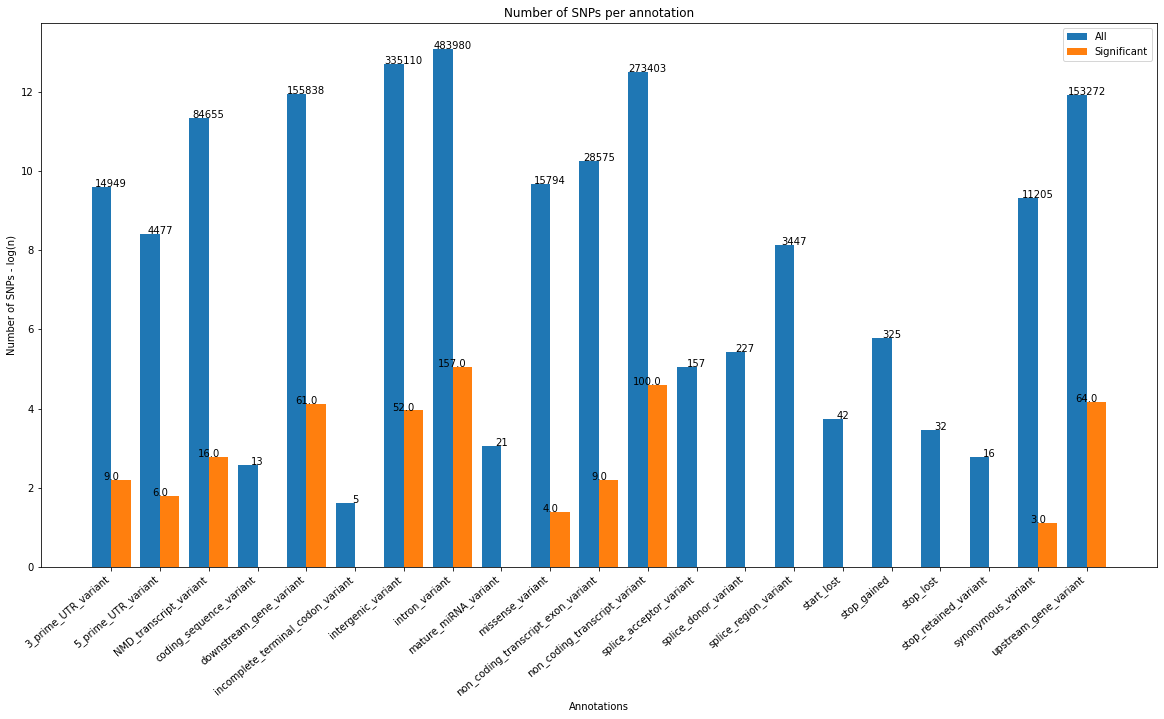

In [11]:

# logarithmic graph of nr of SNPs per annotation (sign and total)\
x = np.arange(1, len(annotations_all)+1)
fig = plt.figure(figsize=(20,10))
plt.bar(x-0.2, np.log(annotations_all), 0.4, label='All')
plt.bar(x+0.2, np.log(annotations_sign), 0.4, label='Significant')
plt.xticks(x, annotations, rotation=40, horizontalalignment='right', fontsize=10)
plt.xlabel("Annotations")
plt.ylabel("Number of SNPs - log(n)")
plt.title("Number of SNPs per annotation")
add_value_label_log(annotations, annotations_all)
add_value_label_log(annotations, annotations_sign)
plt.legend()
plt.show()


In [12]:
# compare the means of random sampling with permutations

# import the results of random sampling

chrom1_random = pd.read_csv("bootstrap10k_chrom1.tsv", sep="\t").T #chrom1_all is observed vals, 
                                                                # chrom1_random is random sampling
chrom1_perm = pd.read_csv("permdata10k_chrom1.tsv", sep="\t").T # chrom1_perm is permutation sampling


In [13]:
chrom1_perm.columns = annotations
chrom1_random.columns = annotations

In [14]:
chrom1_perm.head()


,3_prime_UTR_variant,5_prime_UTR_variant,NMD_transcript_variant,coding_sequence_variant,downstream_gene_variant,incomplete_terminal_codon_variant,intergenic_variant,intron_variant,mature_miRNA_variant,missense_variant,...,non_coding_transcript_variant,splice_acceptor_variant,splice_donor_variant,splice_region_variant,start_lost,stop_gained,stop_lost,stop_retained_variant,synonymous_variant,upstream_gene_variant
0,5.0,4.0,29.0,0.0,33.0,0.0,78.0,135.0,0.0,4.0,...,84.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,45.0
1,1.0,3.0,11.0,0.0,20.0,0.0,121.0,113.0,0.0,0.0,...,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0
2,5.0,4.0,16.0,0.0,45.0,0.0,103.0,119.0,0.0,14.0,...,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,43.0
3,5.0,1.0,15.0,0.0,43.0,0.0,117.0,106.0,0.0,4.0,...,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,33.0
4,5.0,4.0,27.0,0.0,47.0,0.0,76.0,143.0,0.0,10.0,...,74.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,65.0


In [15]:
chrom1_random.head()

,3_prime_UTR_variant,5_prime_UTR_variant,NMD_transcript_variant,coding_sequence_variant,downstream_gene_variant,incomplete_terminal_codon_variant,intergenic_variant,intron_variant,mature_miRNA_variant,missense_variant,...,non_coding_transcript_variant,splice_acceptor_variant,splice_donor_variant,splice_region_variant,start_lost,stop_gained,stop_lost,stop_retained_variant,synonymous_variant,upstream_gene_variant
0,3.0,0.0,19.0,0.0,36.0,0.0,92.0,134.0,0.0,2.0,...,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,44.0
1,5.0,0.0,21.0,0.0,32.0,0.0,95.0,122.0,0.0,9.0,...,69.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,51.0
2,5.0,2.0,26.0,0.0,43.0,0.0,96.0,127.0,0.0,3.0,...,73.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.0
3,5.0,0.0,21.0,0.0,35.0,0.0,98.0,124.0,0.0,5.0,...,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,48.0
4,5.0,1.0,27.0,0.0,34.0,0.0,78.0,144.0,0.0,5.0,...,77.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,40.0


In [16]:
# produce value counts for each annotation and store this in a dictionary

perm_counts = {}
random_counts = {}

for i in range(len(annotations)):
    perm_counts[i] = chrom1_perm[annotations[i]].value_counts()
    random_counts[i] = chrom1_random[annotations[i]].value_counts()

# we now know how many of each sign SNP count are in each annotation for 10k perms/random samples

In [17]:
# Now we get the mean number of sign SNPs for perms and random sampling
perm_average = np.zeros(len(annotations))
random_average = np.zeros(len(annotations))

for i in range(len(annotations)):
        perm_average[i] = np.dot([*perm_counts[i].keys()], [*perm_counts[i]])/10000
        random_average[i] = np.dot([*random_counts[i].keys()], [*random_counts[i]])/10000

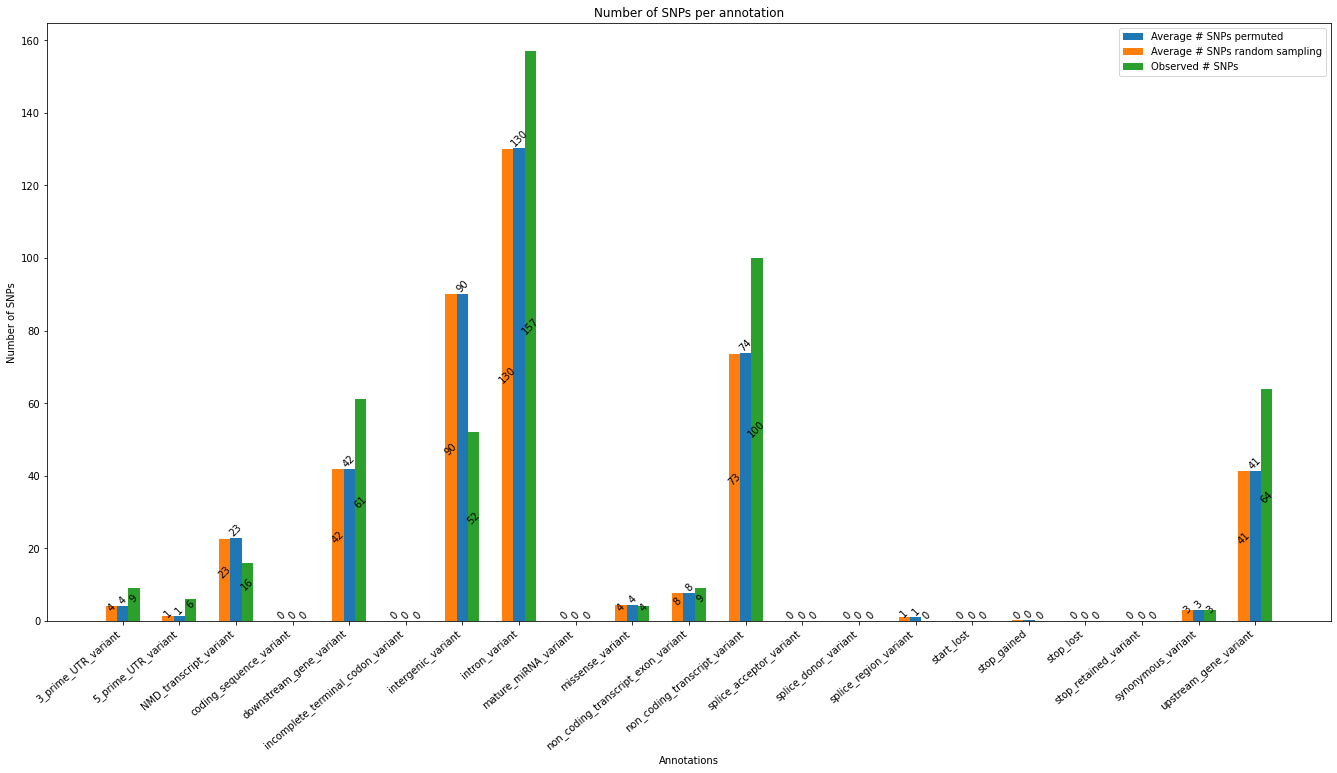

In [18]:
# graph annotations_sign, perm_average, random_average


# graph nr of sign SNPs and 
def add_value_label_perm(x,y):
    for i in range(1, len(x)+1):
        plt.annotate(str(round(y[i-1])),(i,y[i-1]), ha='center', va='bottom', rotation=45)
        
# graph nr of sign SNPs and 
def add_value_label_random(x,y):
    for i in range(1, len(x)+1):
        plt.annotate(str(round(y[i-1])),(i-0.2,y[i-1]/2), ha='center', va='bottom', rotation=45)

# graph nr of sign SNPs and 
def add_value_label_sign(x,y):
    for i in range(1, len(x)+1):
        plt.annotate(str(round(y[i-1])),(i+0.2,y[i-1]/2), ha='center', va='bottom', rotation=45)


# logarithmic graph of nr of SNPs per annotation (sign and total)\
x = np.arange(1, len(annotations_all)+1)
fig = plt.figure(figsize=(23,11))
plt.bar(x, perm_average, 0.2, label='Average # SNPs permuted')
plt.bar(x-0.2, random_average, 0.2, label='Average # SNPs random sampling')
plt.bar(x+0.2, annotations_sign, 0.2, label='Observed # SNPs')
plt.xticks(x, annotations, rotation=40, horizontalalignment='right', fontsize=10)
plt.xlabel("Annotations")
plt.ylabel("Number of SNPs")
plt.title("Number of SNPs per annotation")
add_value_label_perm(annotations, perm_average)
add_value_label_random(annotations, random_average)
add_value_label_sign(annotations, annotations_sign)
plt.legend()
plt.show()


/exports/igmm/eddie/GWAS-annotations/annotation-env/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


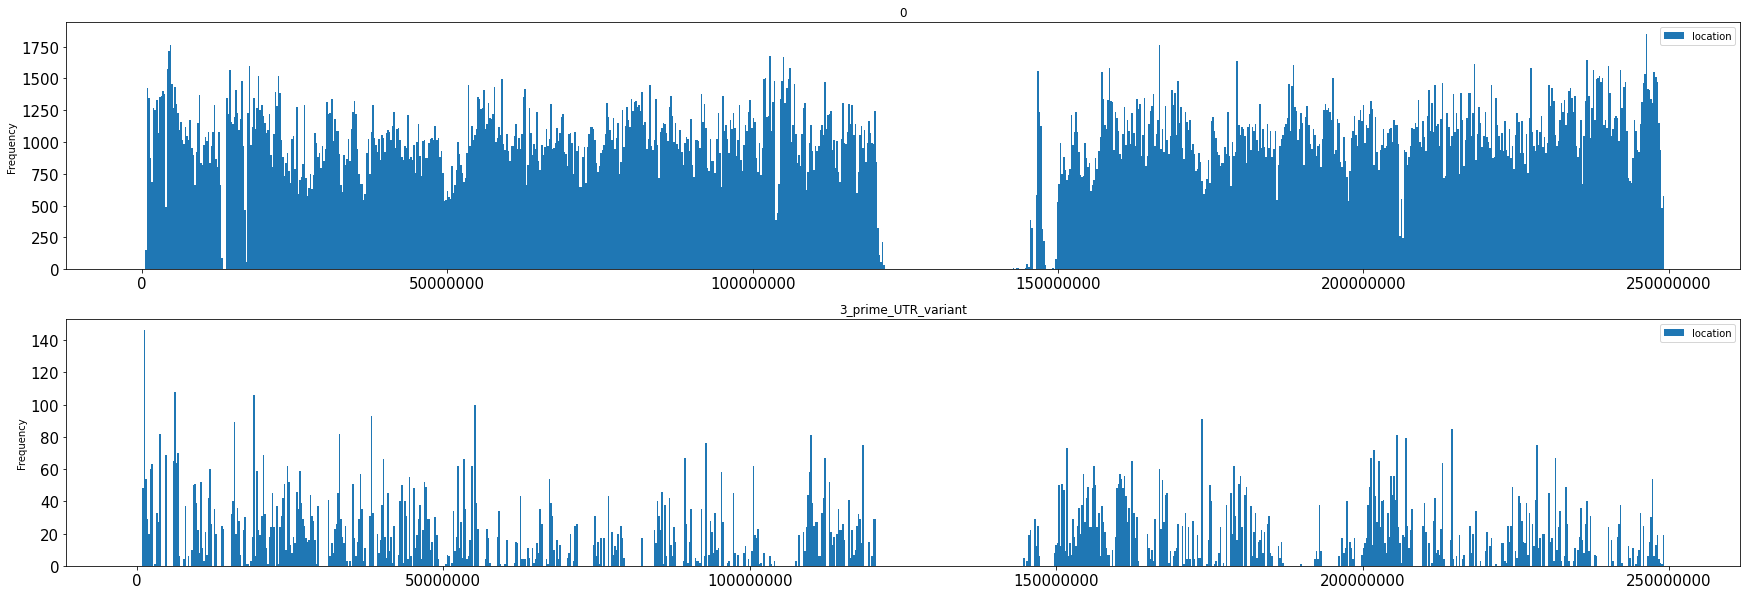

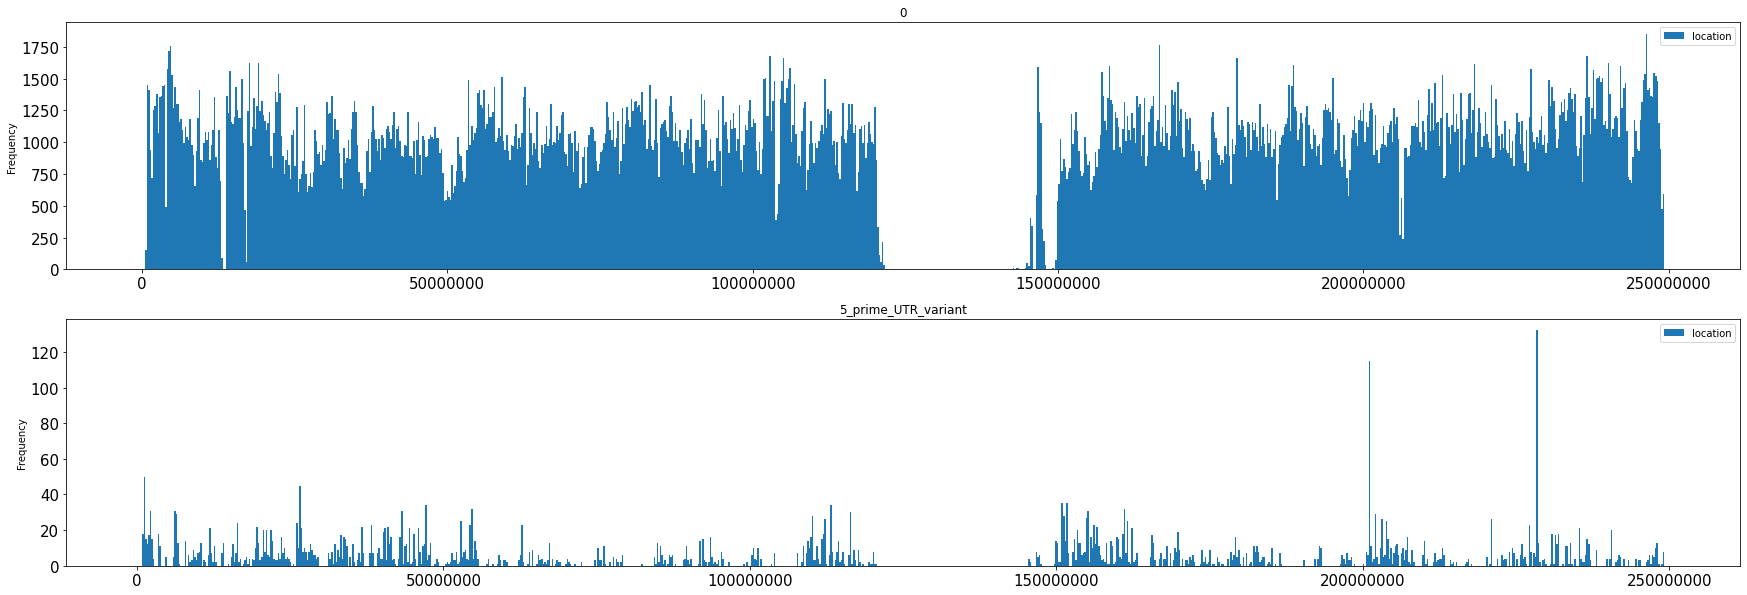

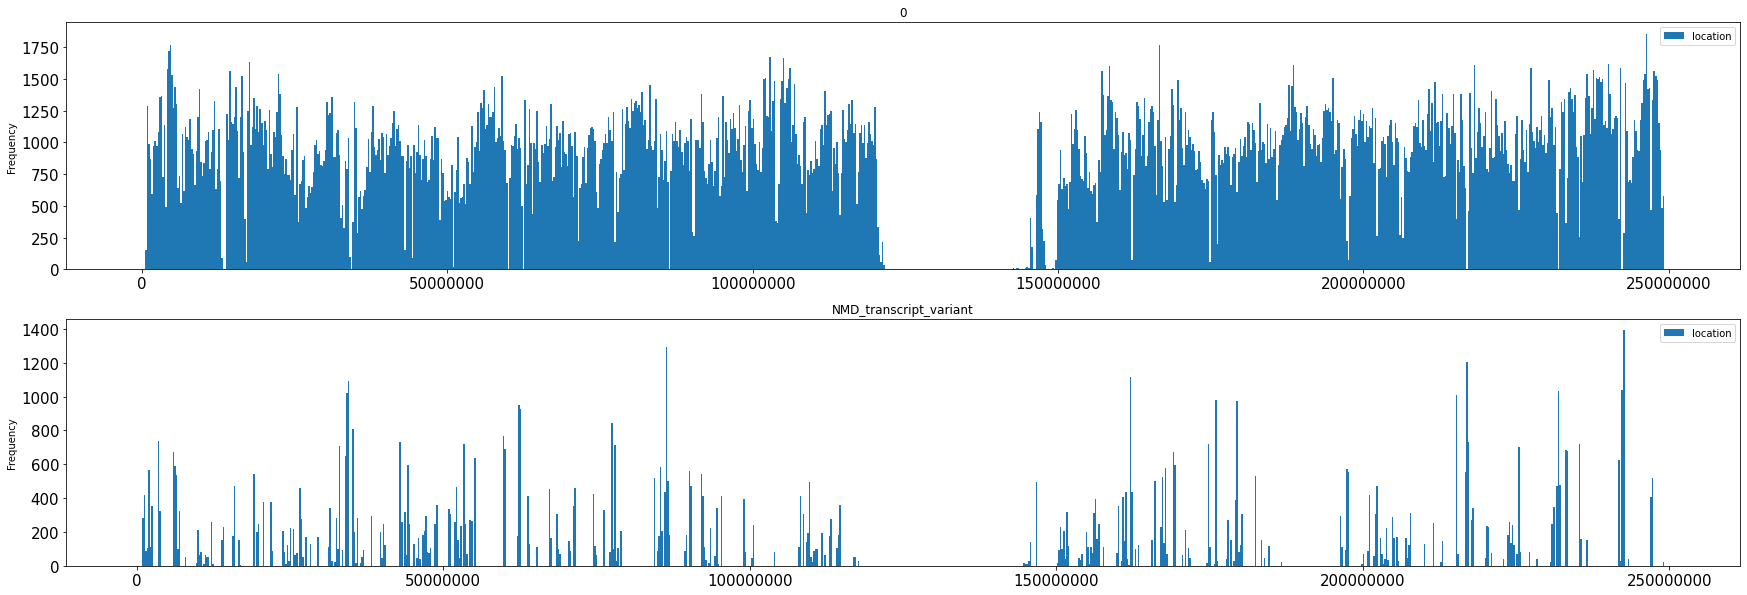

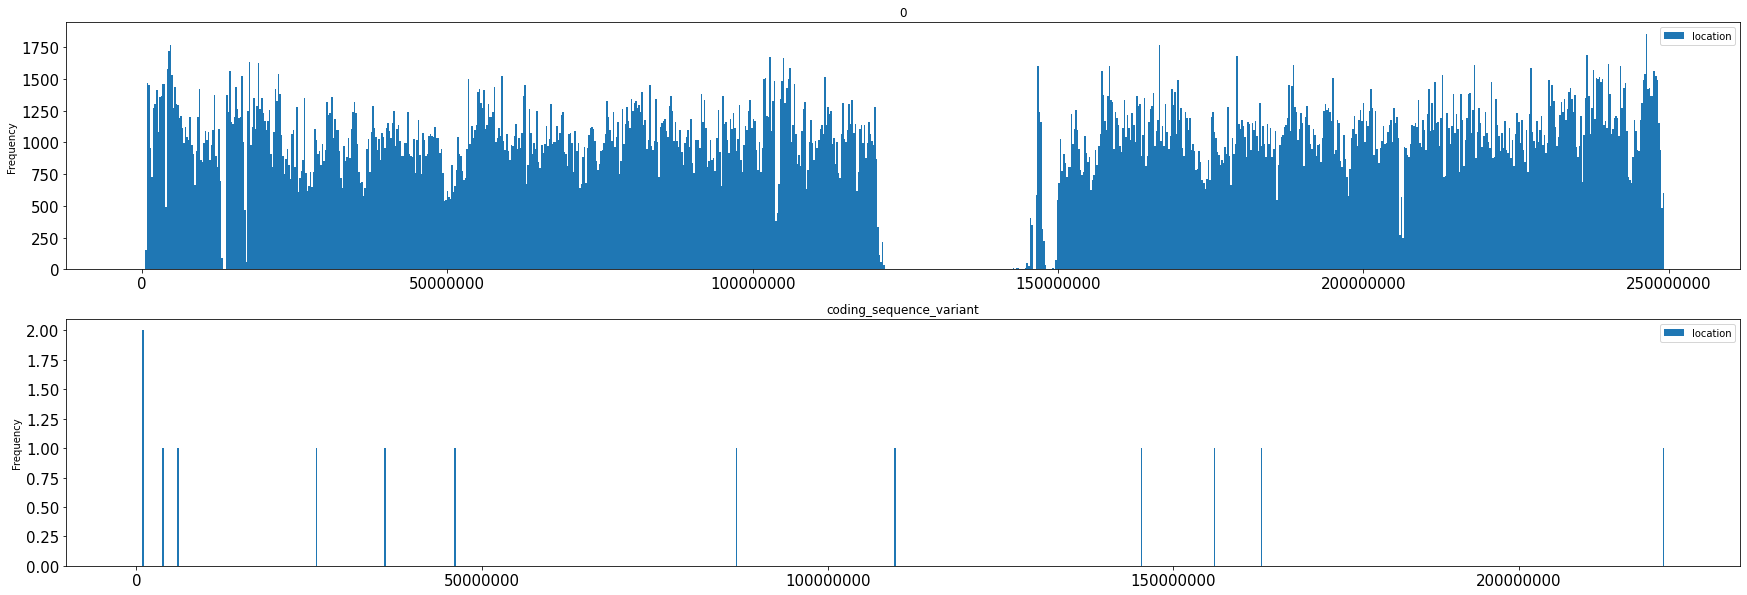

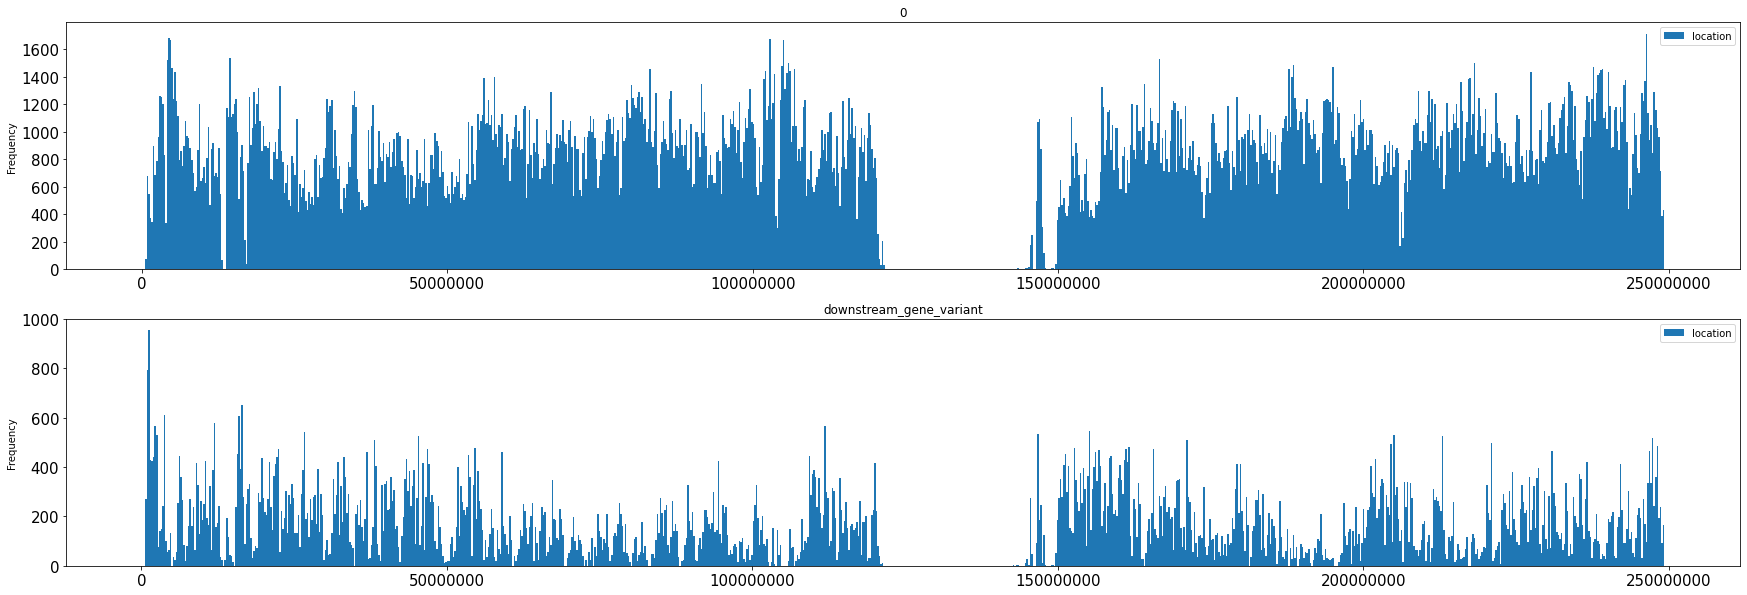

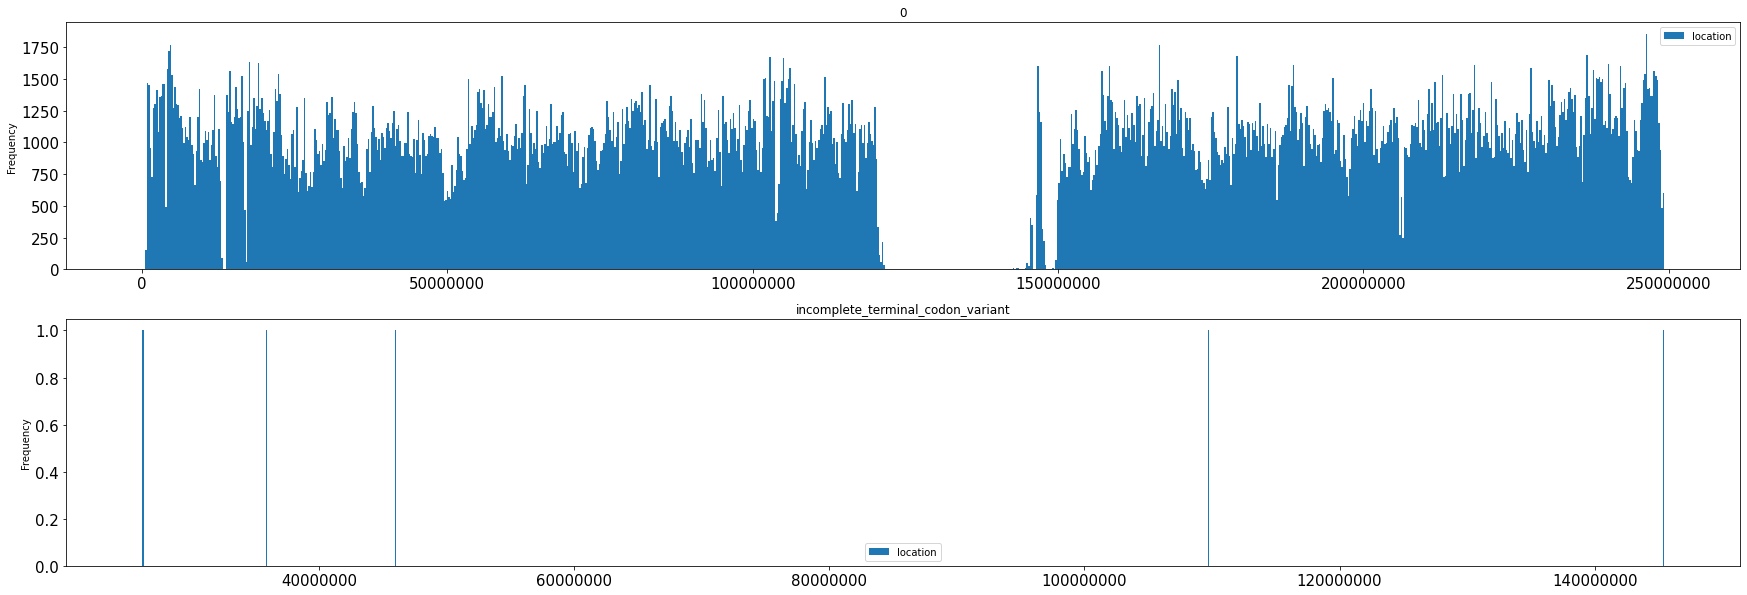

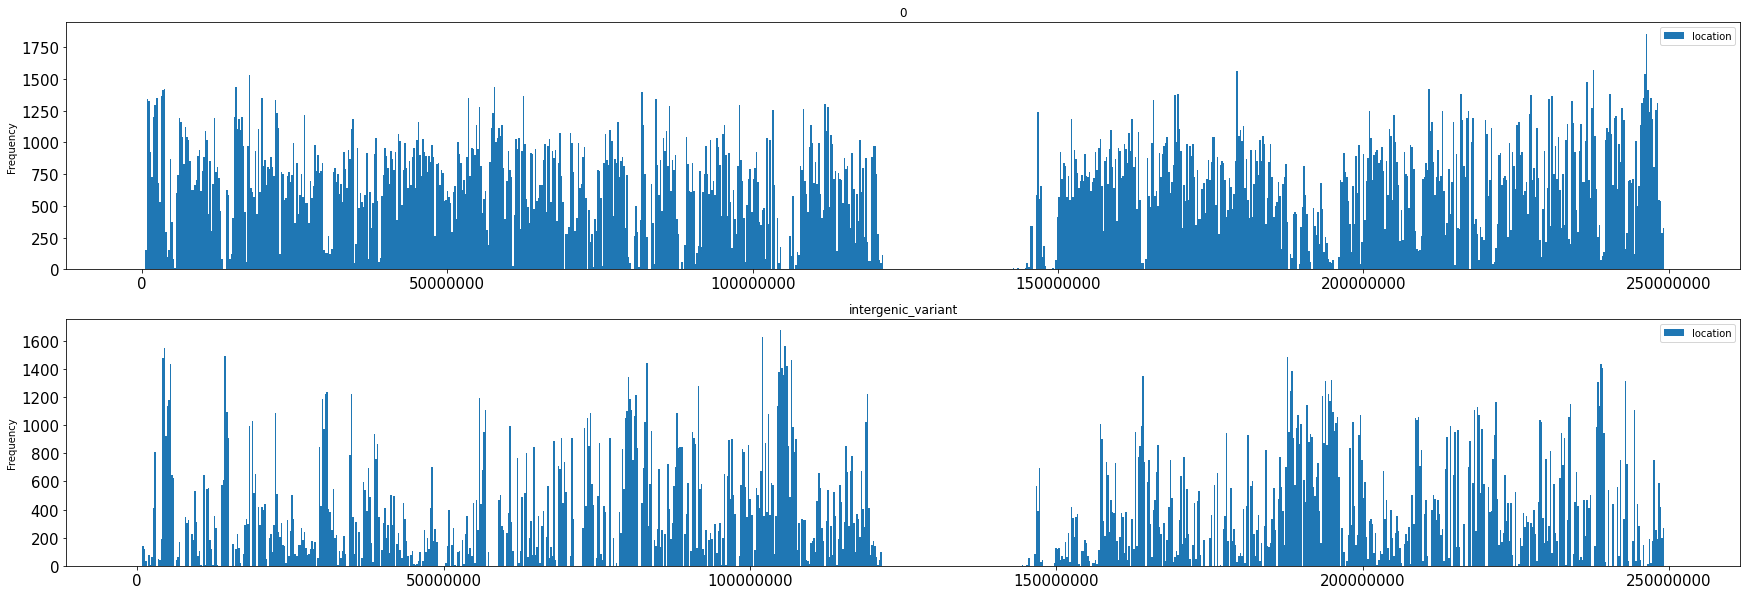

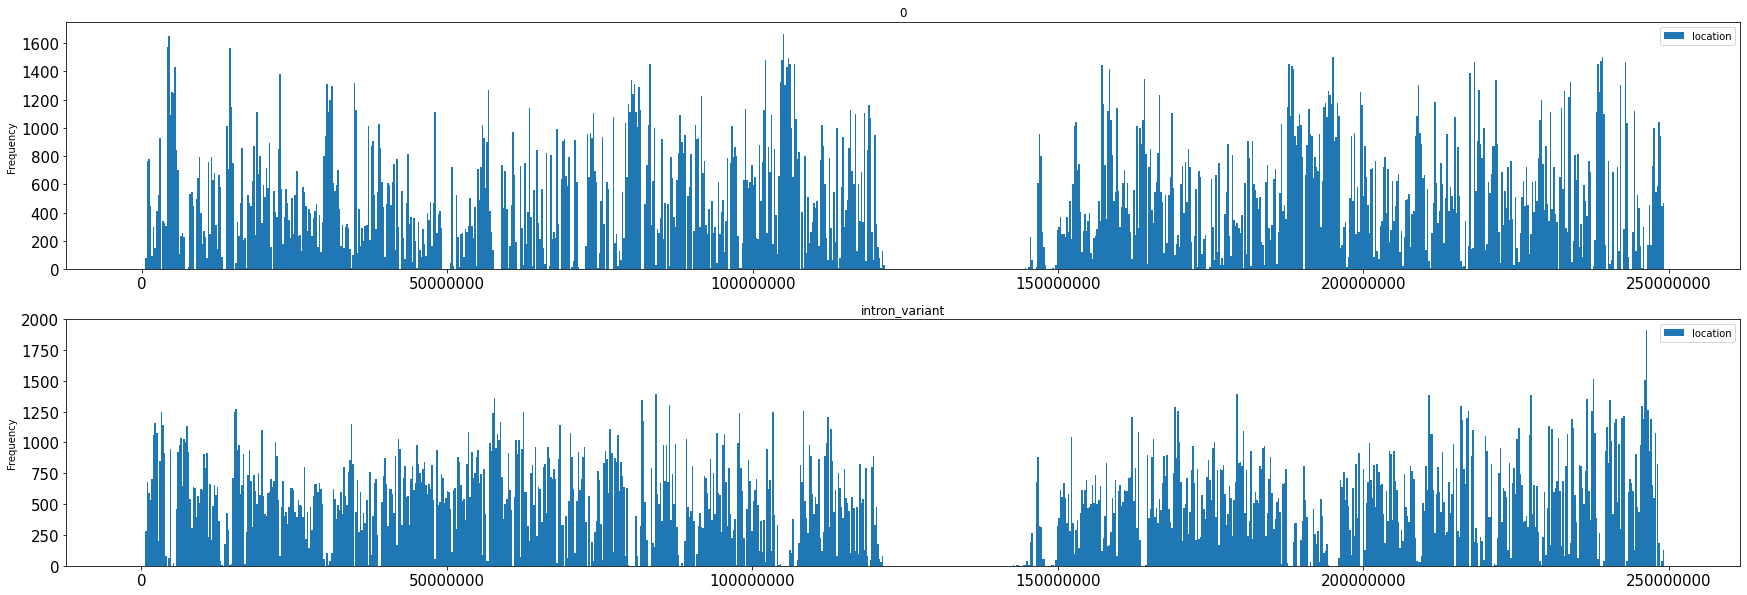

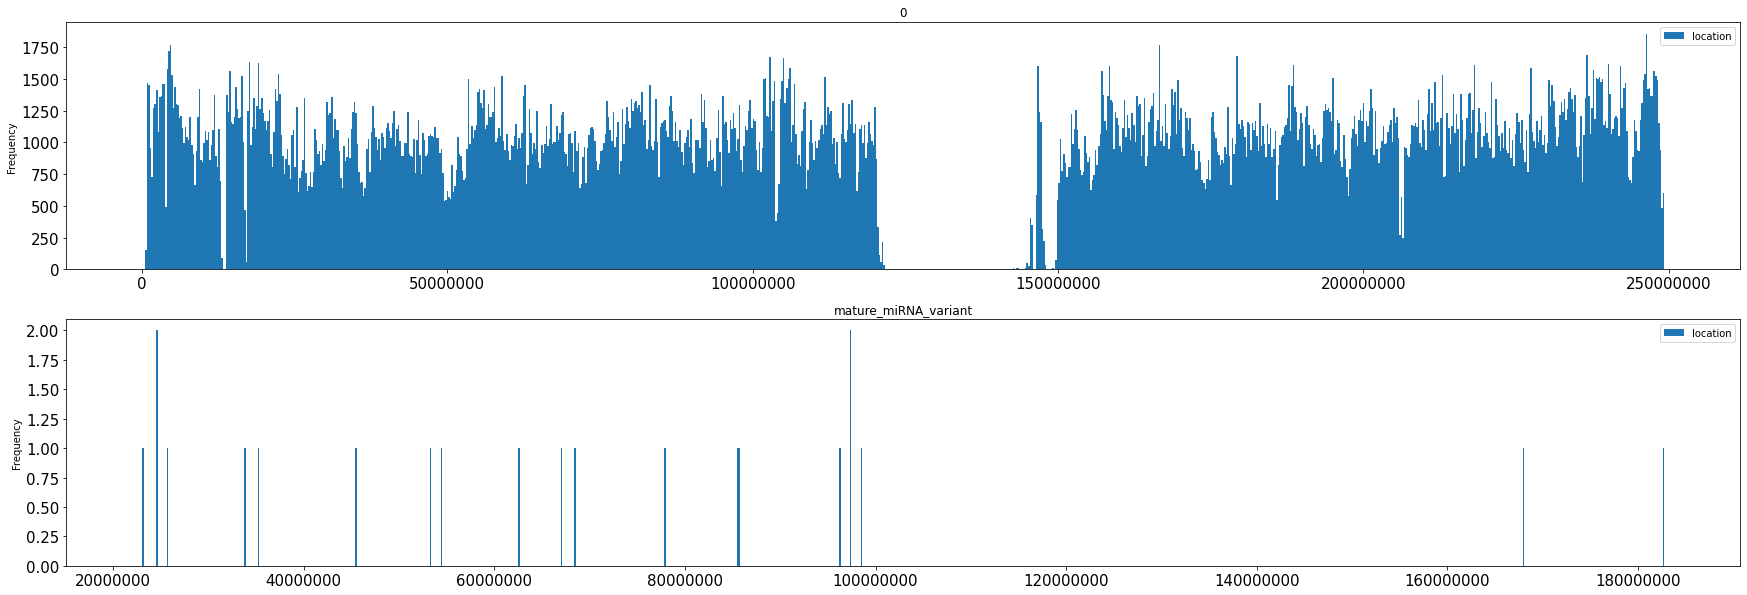

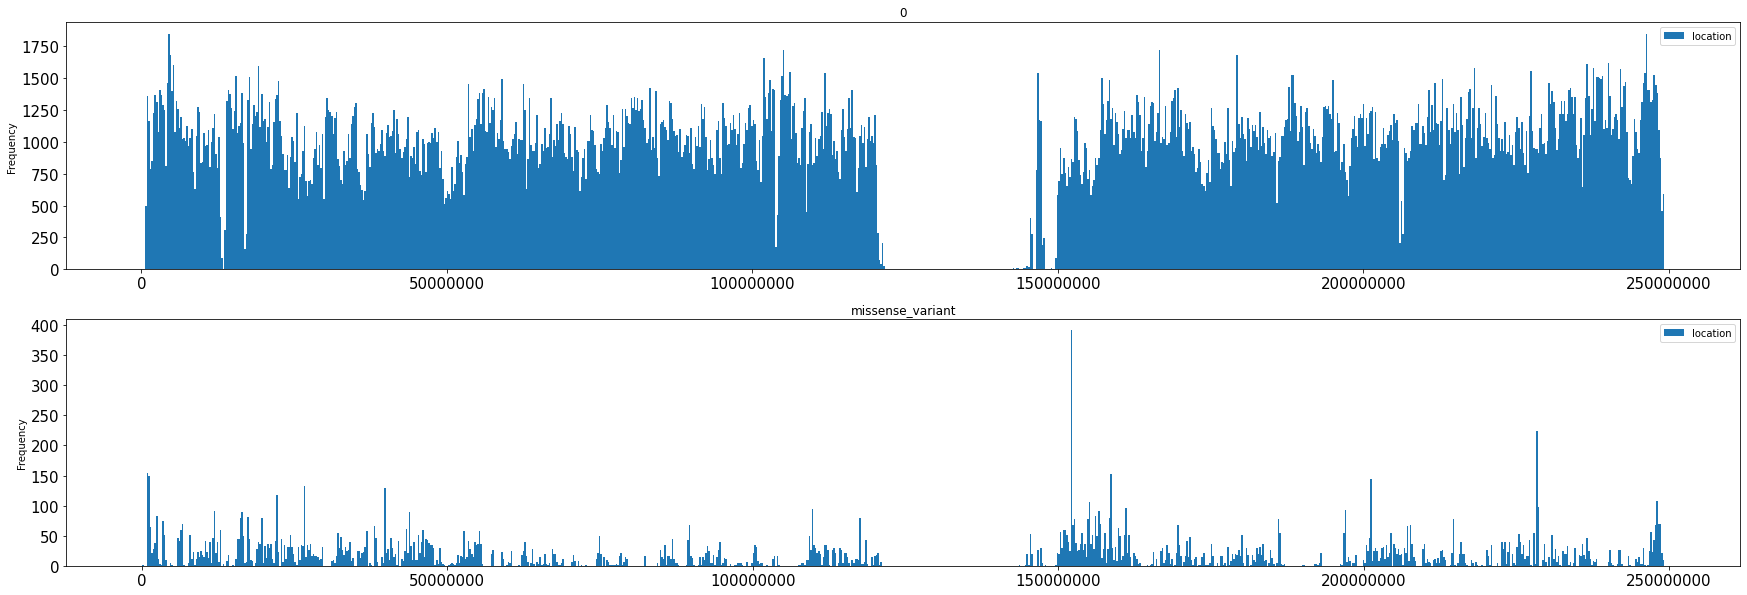

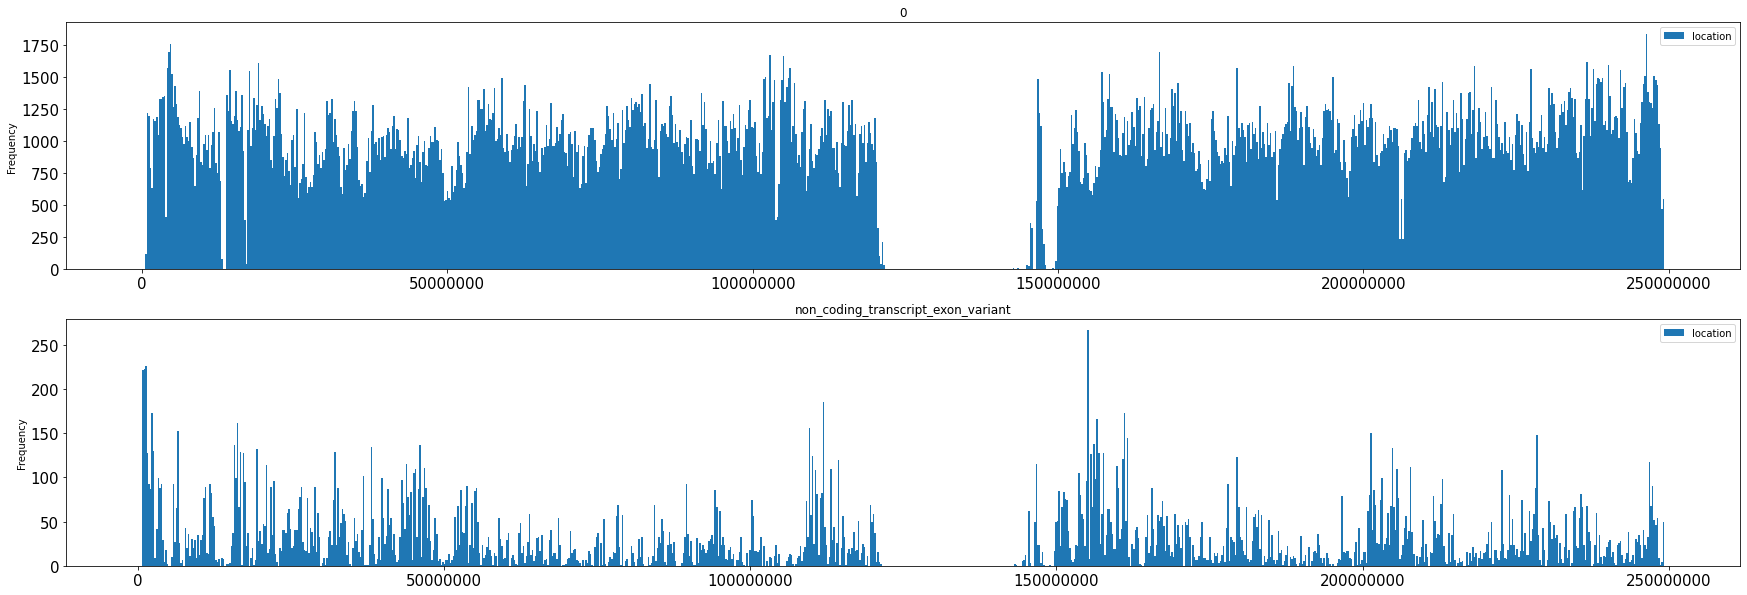

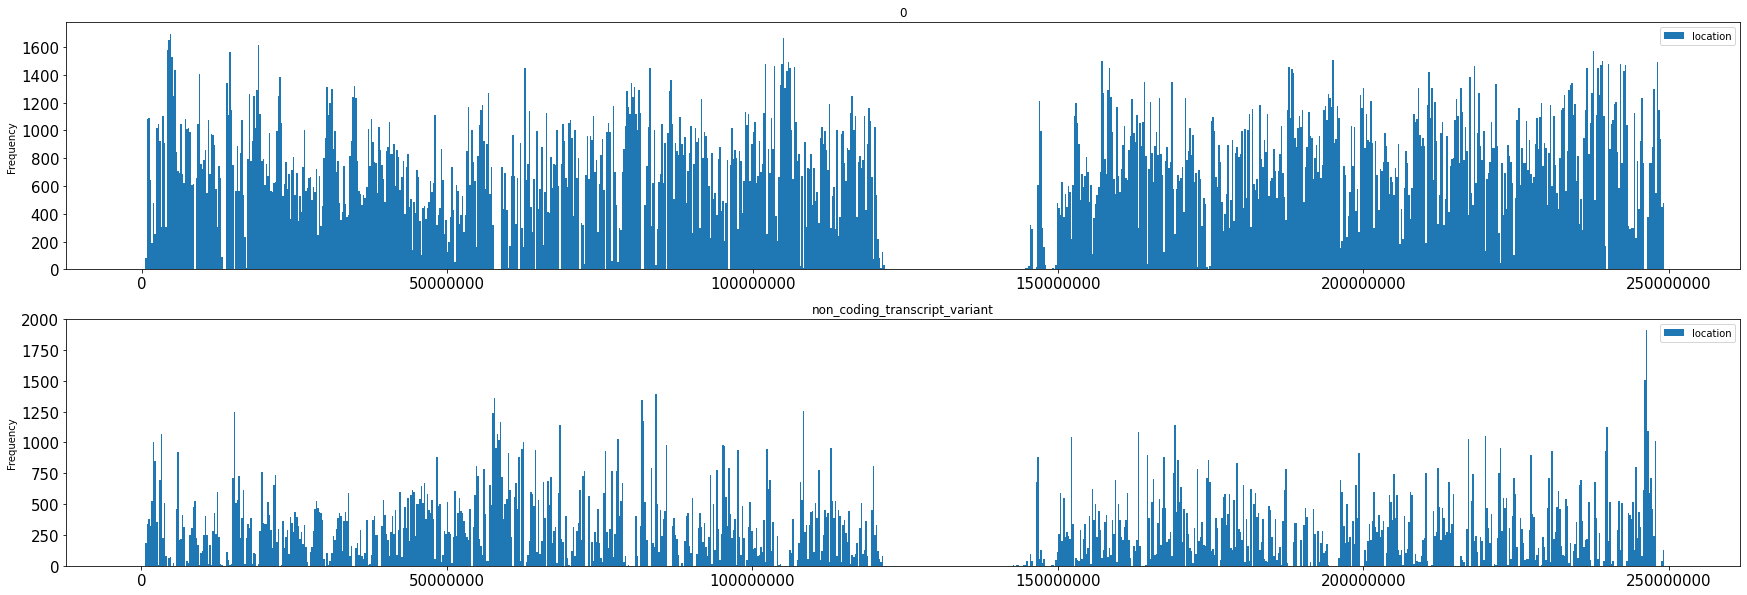

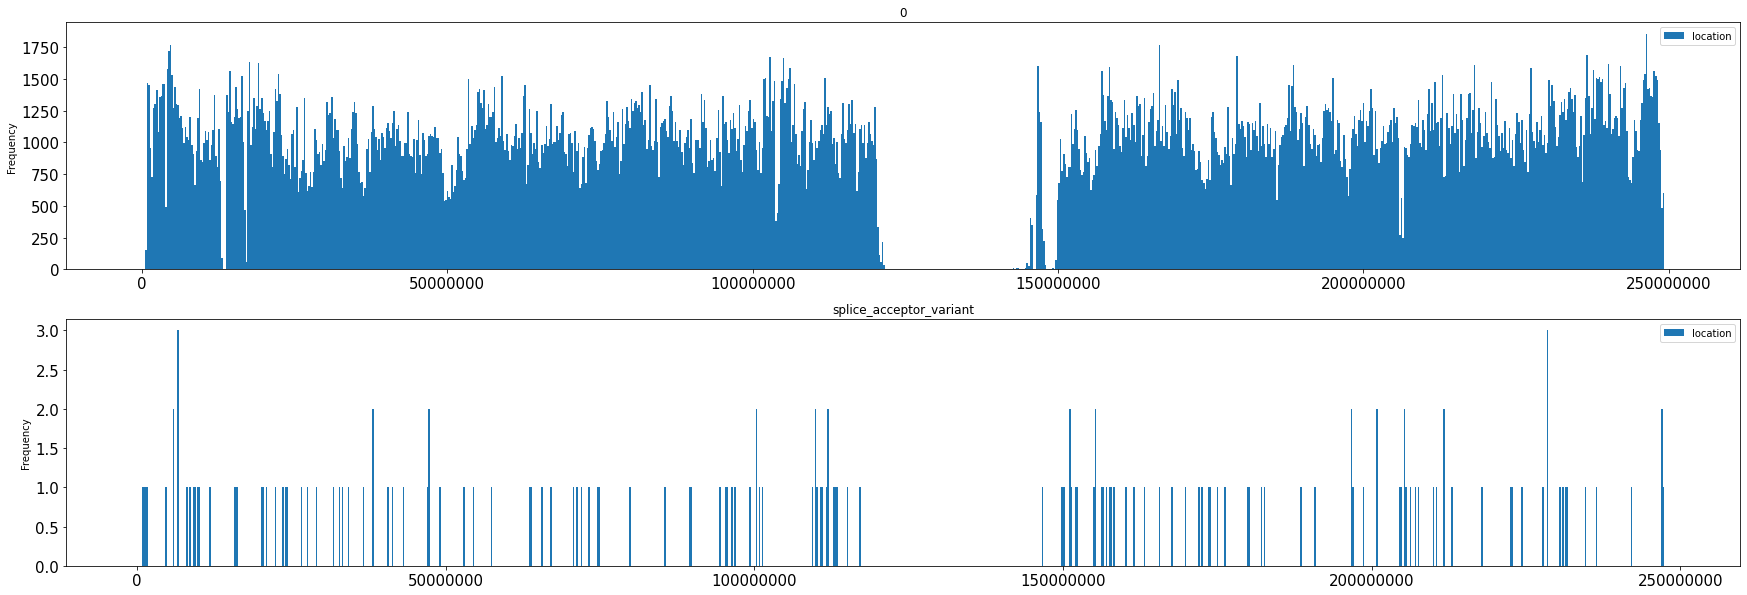

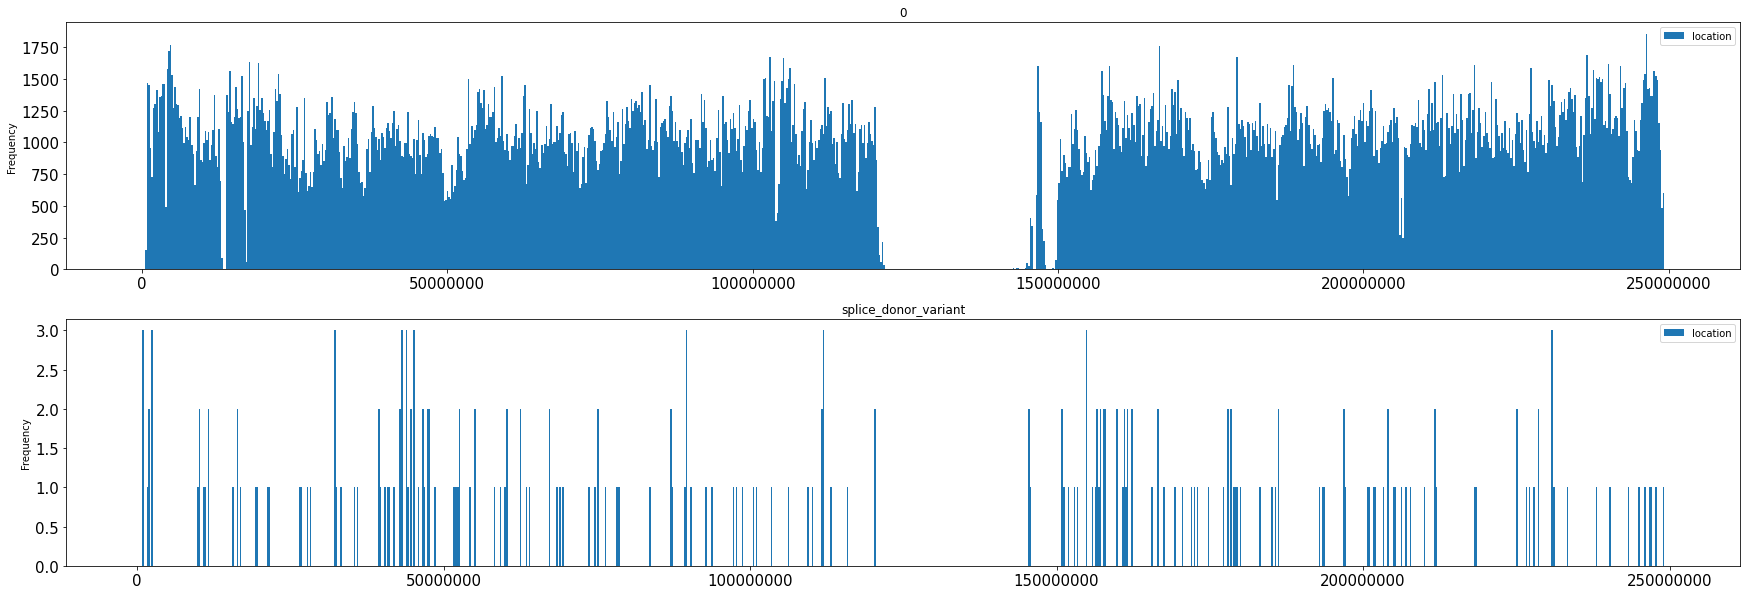

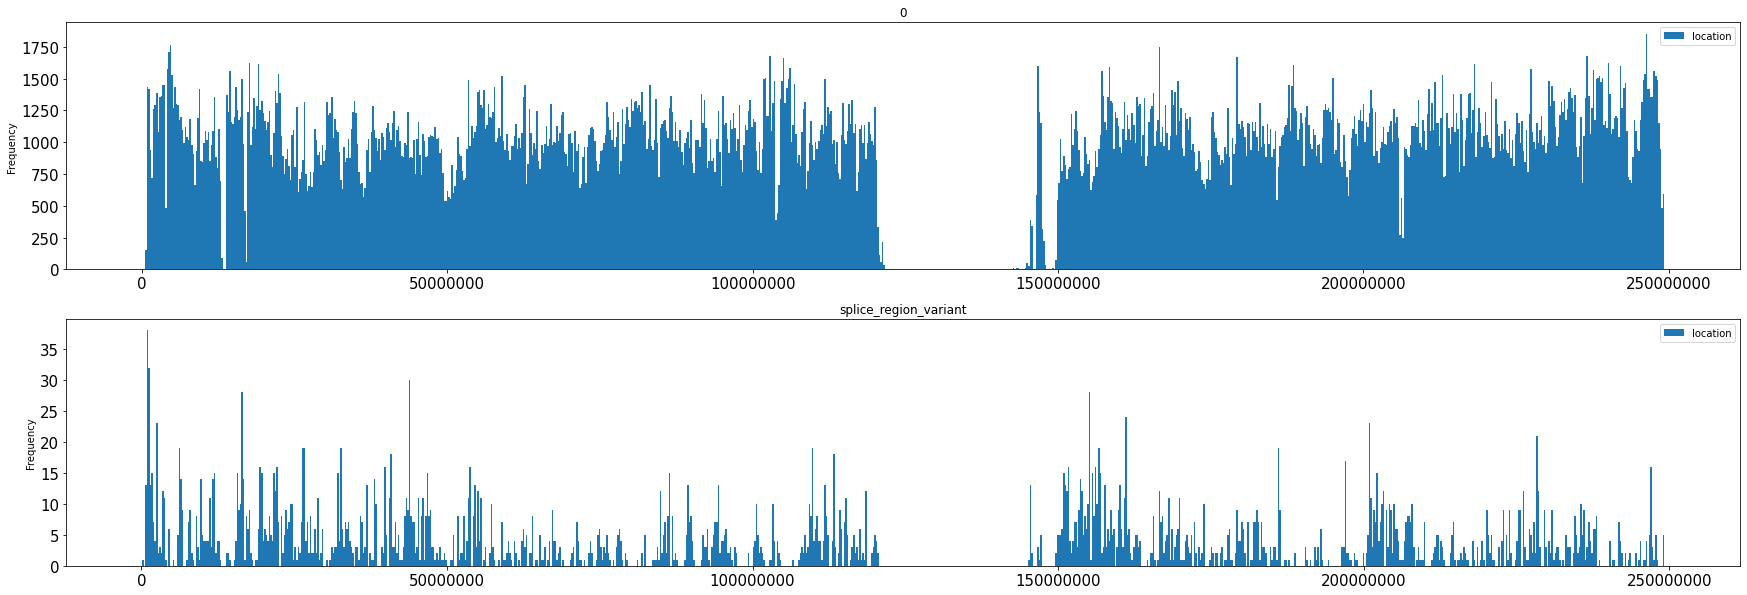

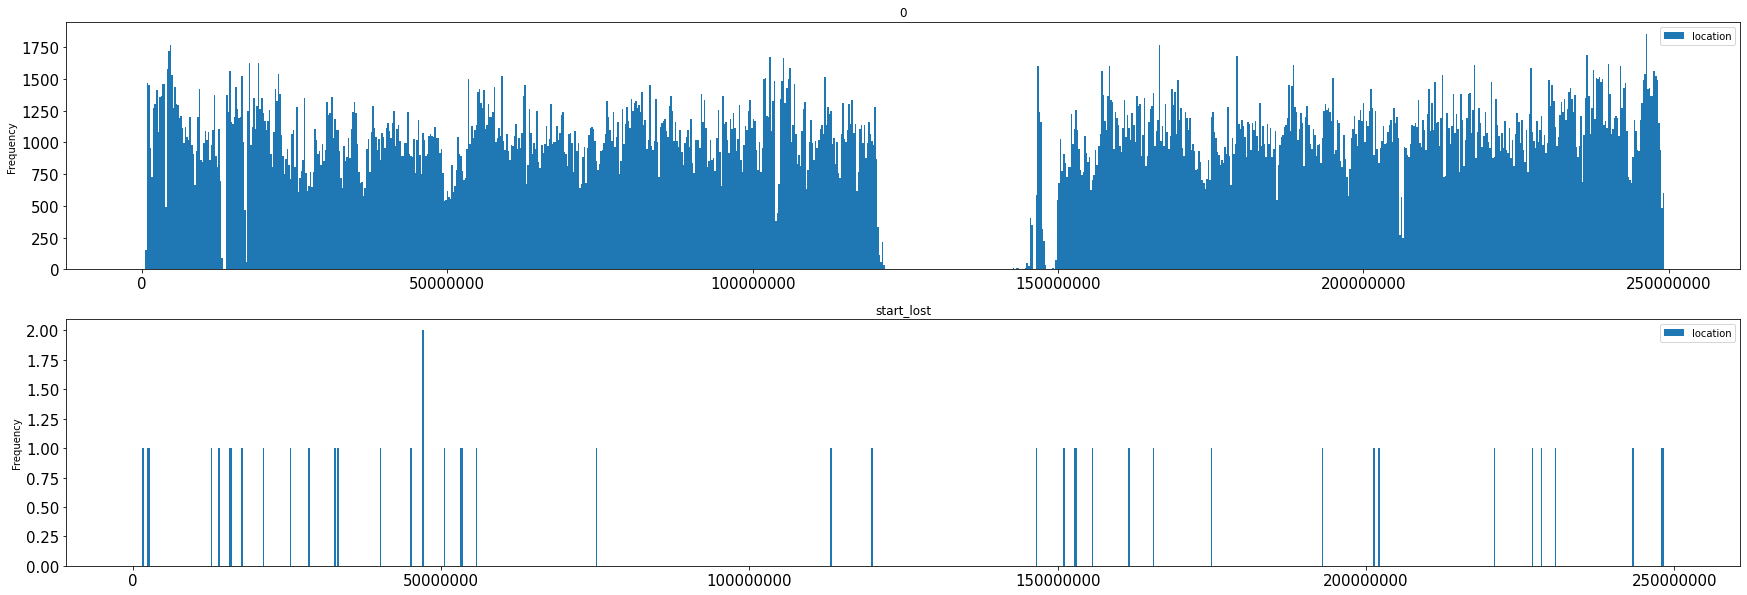

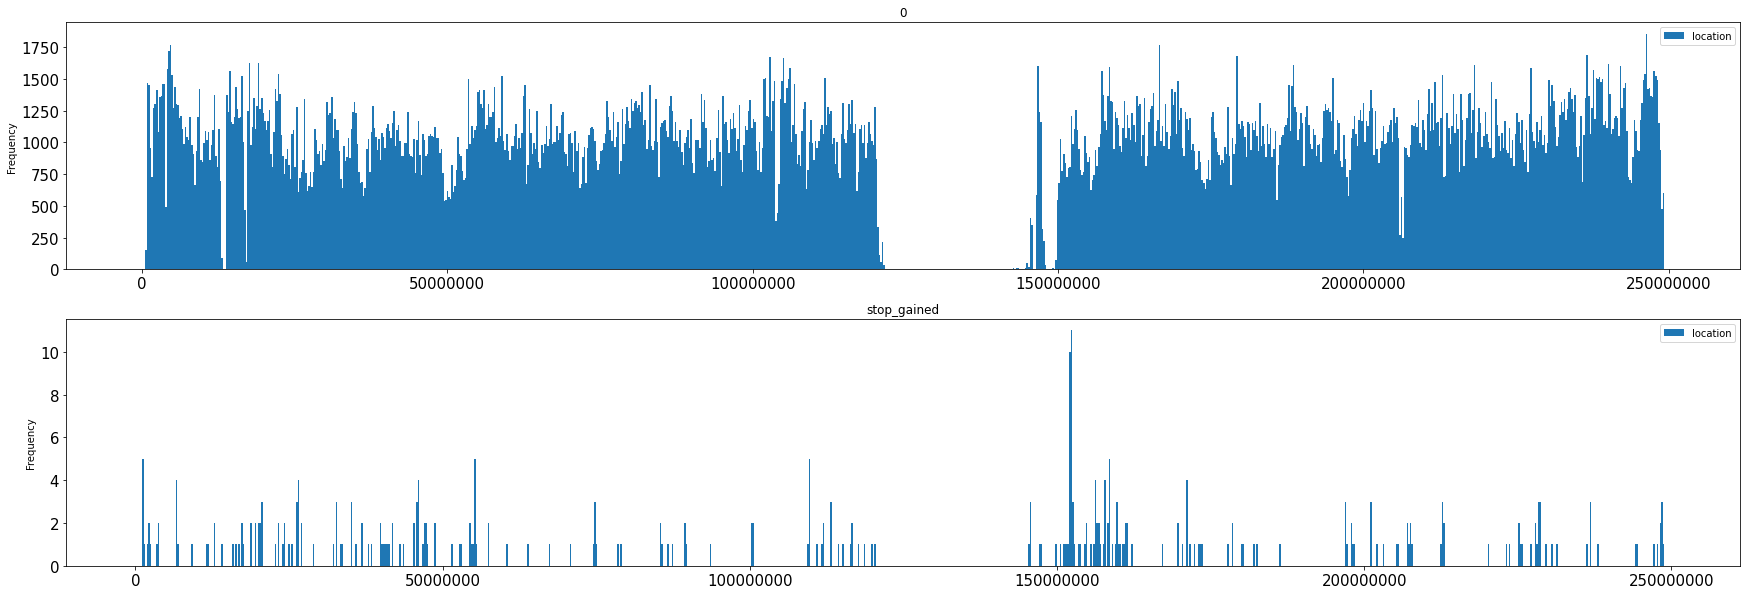

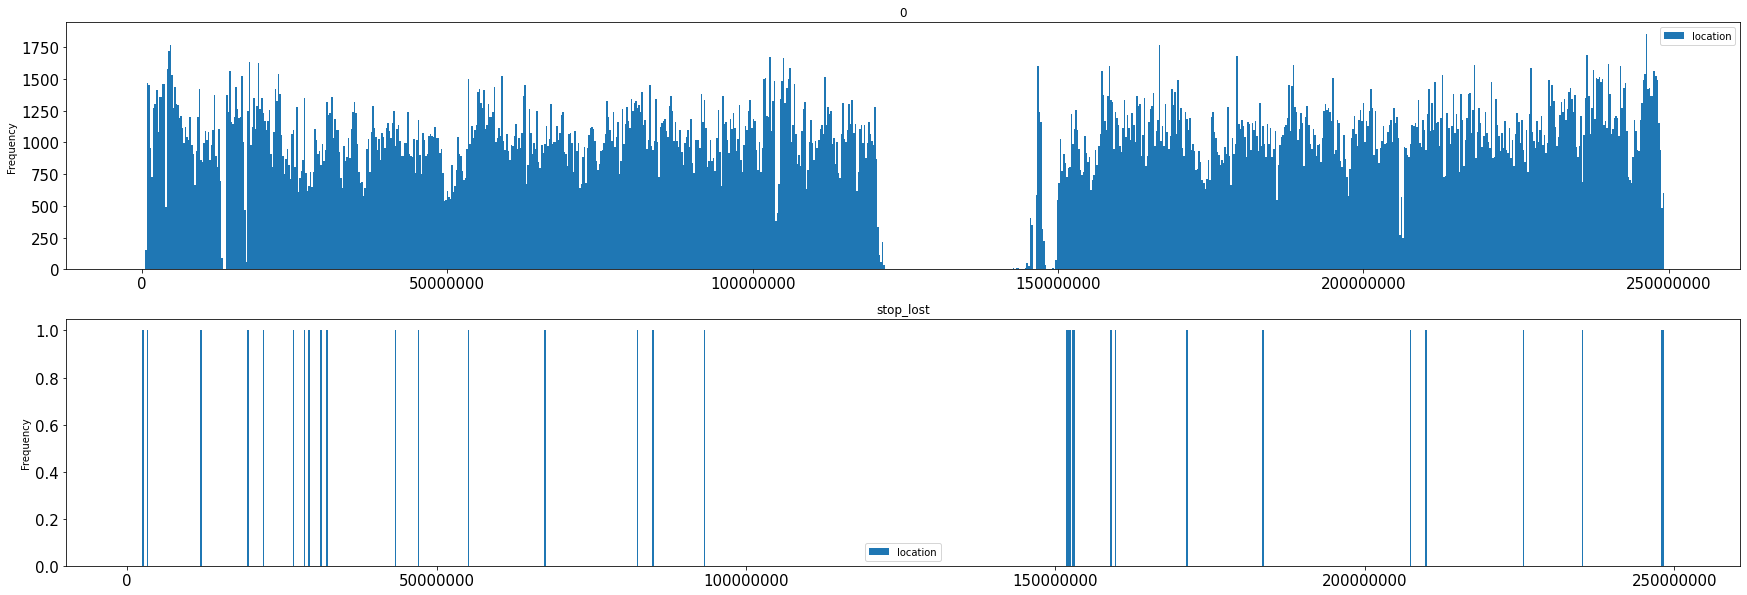

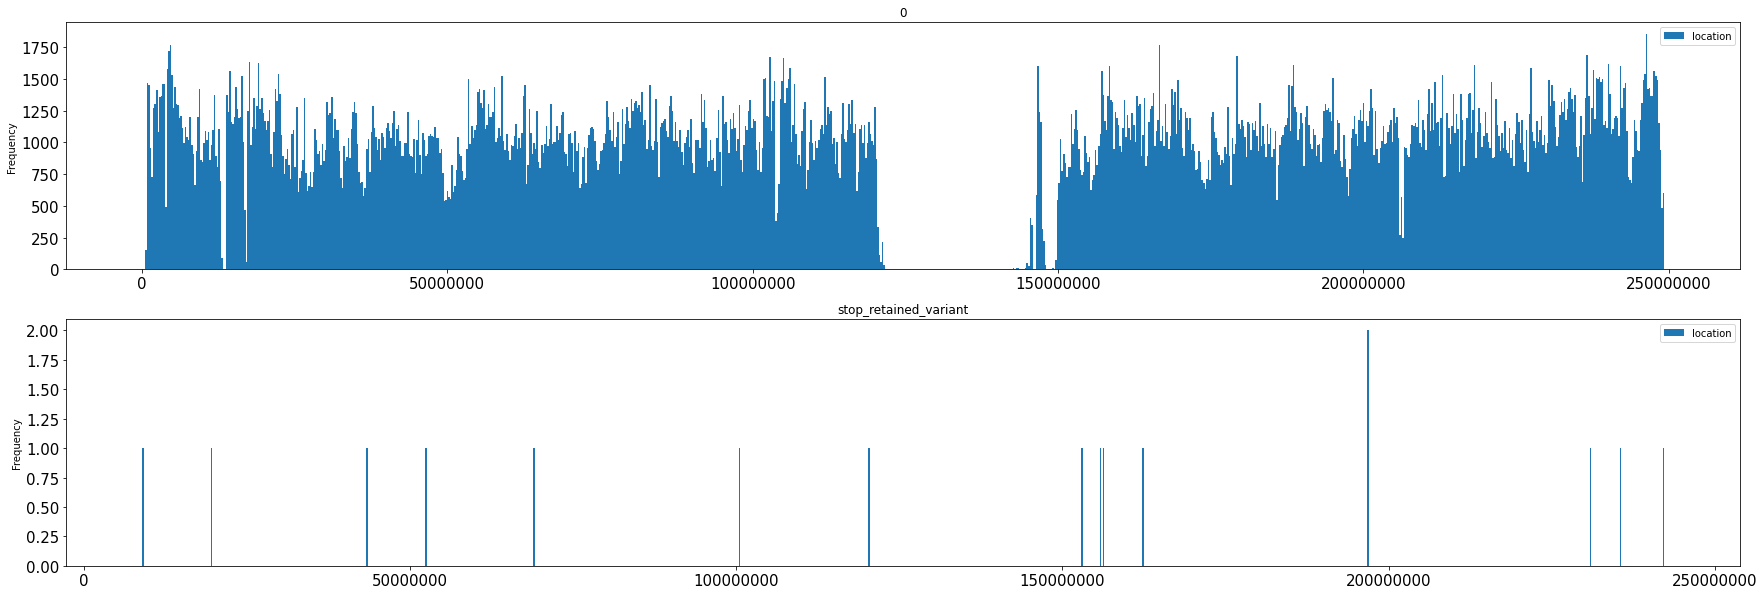

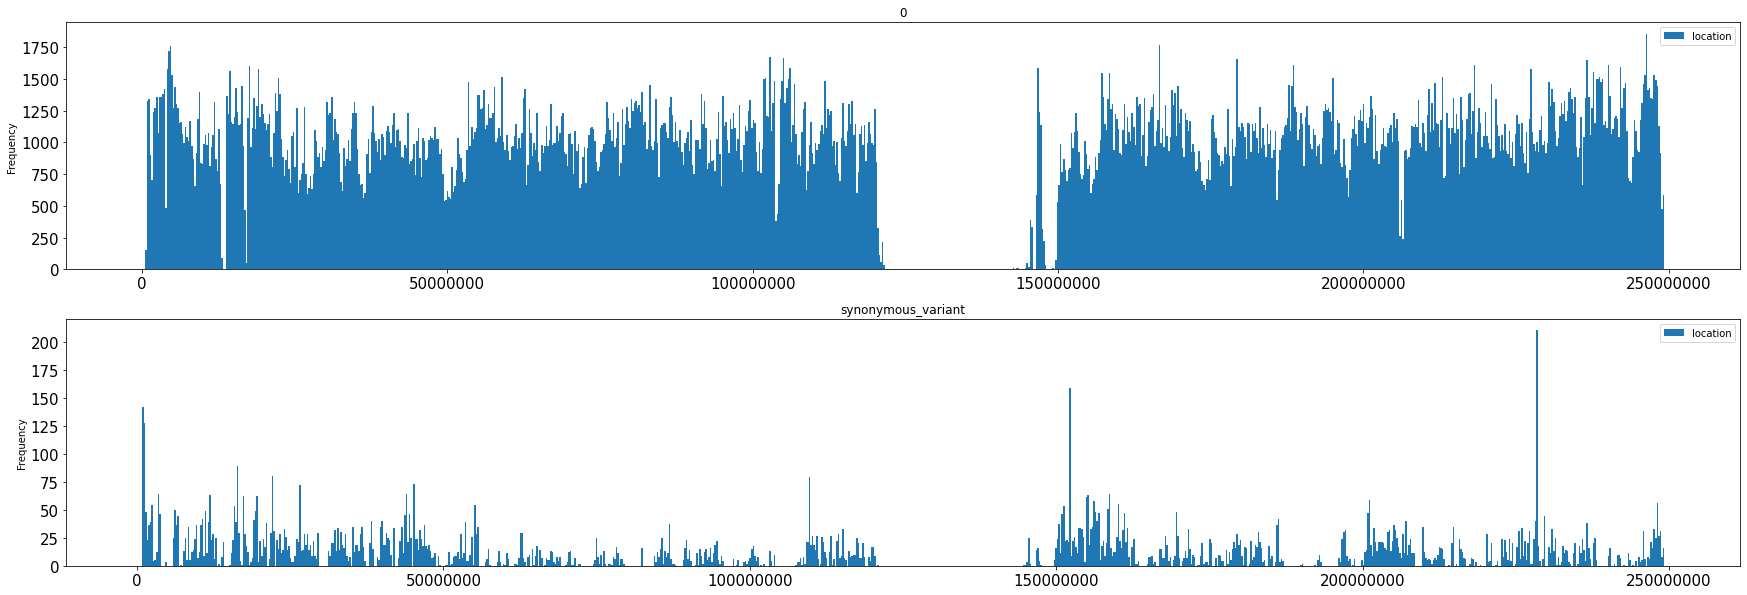

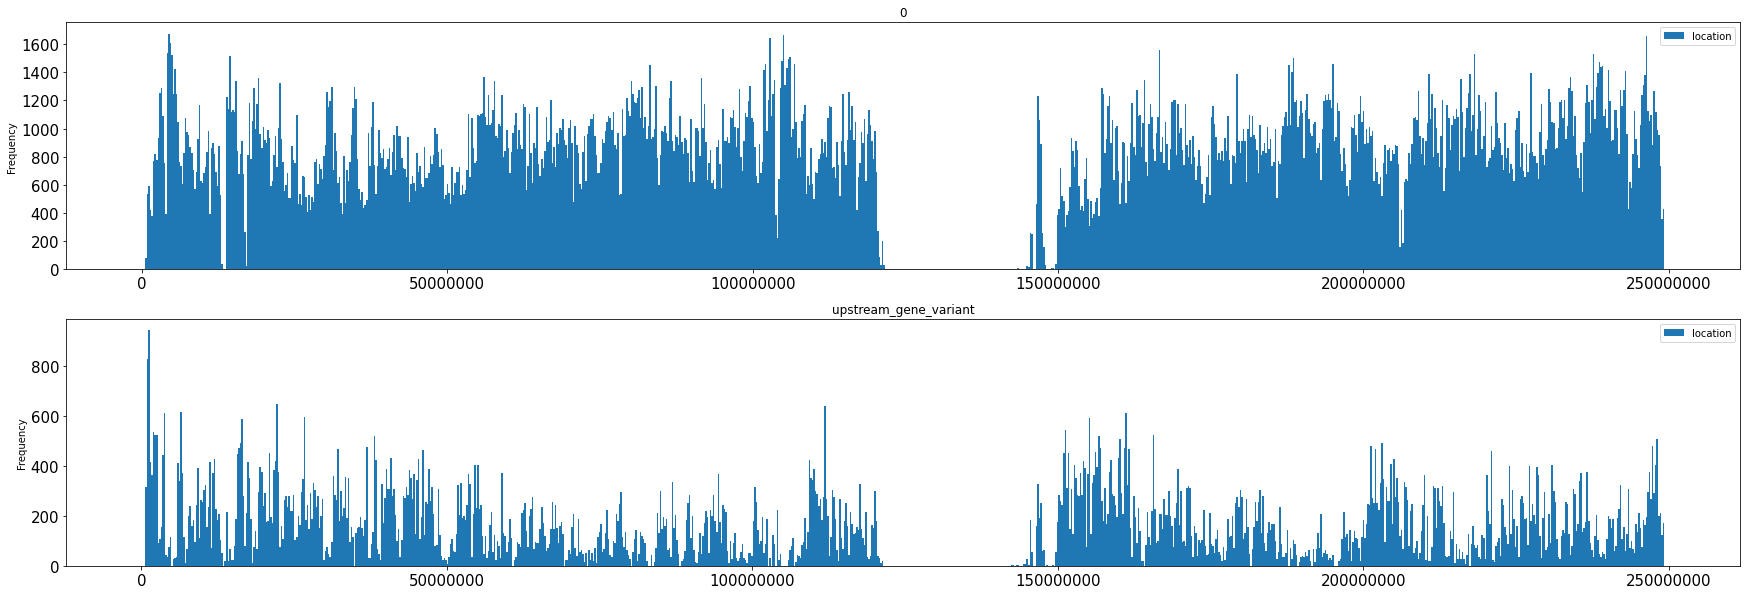

In [116]:
# Look at distribution of significant SNPs in an annotation across the chromosome

for i in range(len(annotations)):
    chrom1_all.plot.hist(column='location', by=annotations[i], bins=1000, figsize=(30,10), fontsize=15)
    plt.title(annotations[i])
    plt.savefig(f"{i}_location_image.png")
    
    
# how do i make the axes better lol。。。 tried and failed


Text(0.5, 1.0, '5_prime_UTR_variant')

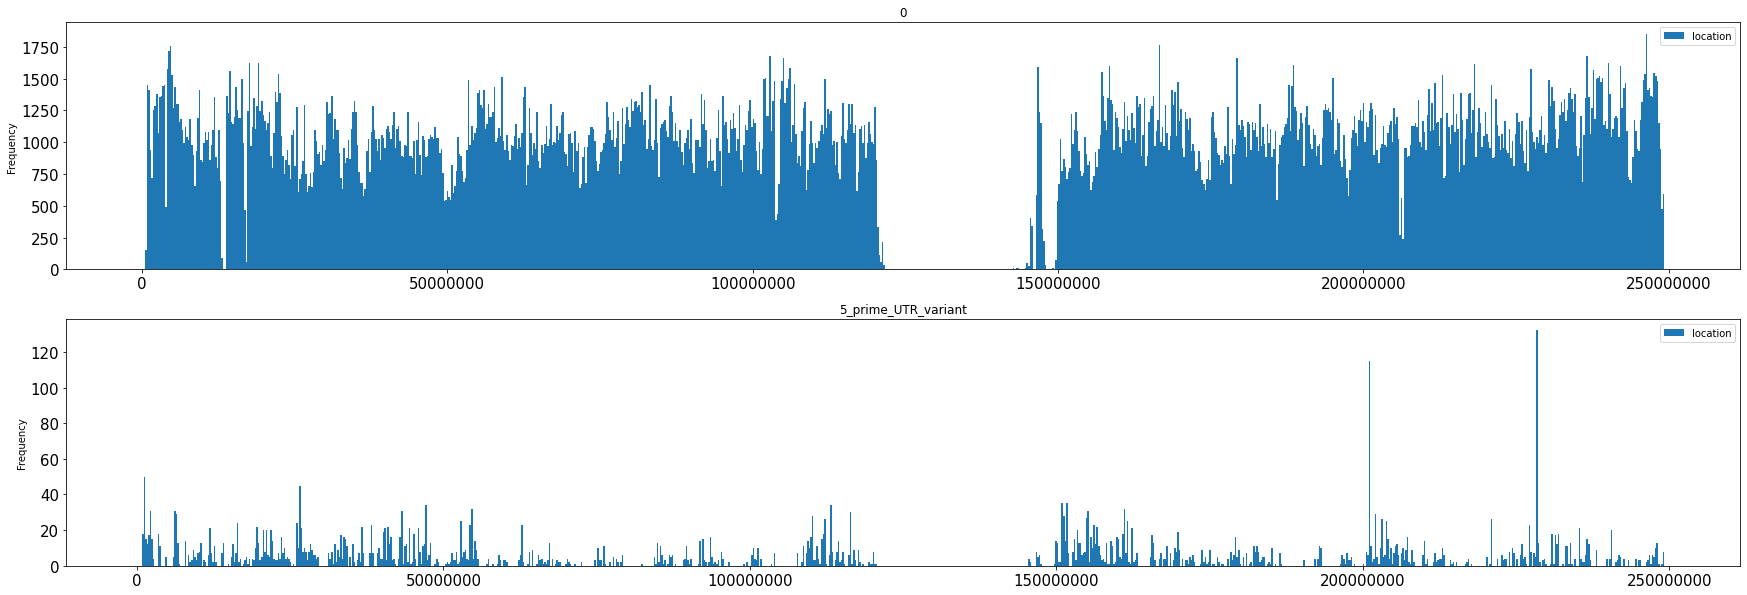

In [115]:
#plt.rcParams["axes.formatter.limits"] = (0, 100)
#pd.set_option('display.float_format', lambda x: '%.8f' % x)
#chrom1_all.to_html(float_format='{:10.9f}'.format)
fig, ax = chrom1_all.plot.hist(column='location', by=annotations[1], bins=1000, figsize=(30,10), fontsize=15)
plt.title(annotations[1])


In [89]:
chrom1_all

,location,significant,3_prime_UTR_variant,5_prime_UTR_variant,NMD_transcript_variant,coding_sequence_variant,downstream_gene_variant,incomplete_terminal_codon_variant,intergenic_variant,intron_variant,...,non_coding_transcript_variant,splice_acceptor_variant,splice_donor_variant,splice_region_variant,start_lost,stop_gained,stop_lost,stop_retained_variant,synonymous_variant,upstream_gene_variant
0,69487.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,69569.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,139853.0,0.0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,693731.0,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,707522.0,0.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948312,249229734.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948313,249229967.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948314,249230279.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948315,249230793.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
